Accessing the [Yelp API](https://www.yelp.com/developers)


The library that makes this possible is called [Requests](http://docs.python-requests.org/en/latest/)

In [1]:
import requests

https://www.yelp.com/developers/documentation/v3/get_started

In [11]:
AUTHENTICATION_URL = "https://api.yelp.com/oauth2/token"
GRANT_TYPE="client_credentials"
APP_ID="4EDvg4OOFwJB-NT-tovQZQ"
APP_SECRET="r9YgAPf97vkyNvMWiEQySBG2ZoAL3TX8s28Po5kpk99y0I8NuoBGBB25nTMnVkrW"

In [17]:


authentication_response = requests.post(AUTHENTICATION_URL, 
                         data={"grant_type": GRANT_TYPE,
                               "client_id": APP_ID,
                               "client_secret":APP_SECRET},
                        headers={"content-type":"application/x-www-form-urlencoded"})
authentication_response.json()

{'access_token': '4syVgjjcxtyrf0vJAO4IanHdtpNquXN1MZuokIkNQsPsPZ_70Y4mSBk10bX7y5HrbcNJfE4daP1TNVY5d-h2w-MpF88OPNDZEUATIRDMwxjddnj78LCSzeTxNUblWHYx',
 'expires_in': 15551878,
 'token_type': 'Bearer'}

In [19]:
authentication_token = authentication_response.json()['access_token']
authentication_token

'4syVgjjcxtyrf0vJAO4IanHdtpNquXN1MZuokIkNQsPsPZ_70Y4mSBk10bX7y5HrbcNJfE4daP1TNVY5d-h2w-MpF88OPNDZEUATIRDMwxjddnj78LCSzeTxNUblWHYx'

https://www.yelp.com/developers/documentation/v3/business_search

In [22]:
SEARCH_URL = "https://api.yelp.com/v3/businesses/search"
SEARCH_LOCATION = "Pittsburgh"
SEARCH_LIMIT = 50

In [23]:
search_response = requests.get(SEARCH_URL,
                               headers={"Authorization":"Bearer {}".format(authentication_token)},
                               params={"term":"",
                                       "location":SEARCH_LOCATION,
                                       "limit":SEARCH_LIMIT})
search_response.json()

{'businesses': [{'categories': [{'alias': 'gardens',
     'title': 'Botanical Gardens'},
    {'alias': 'parks', 'title': 'Parks'}],
   'coordinates': {'latitude': 40.439248, 'longitude': -79.947347},
   'display_phone': '(412) 622-6914',
   'distance': 2753.5113774459996,
   'id': 'phipps-conservatory-and-botanical-gardens-pittsburgh',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/gVY6b6FGf29TPpyRfec_eA/o.jpg',
   'is_closed': False,
   'location': {'address1': '1 Schenley Park',
    'address2': None,
    'address3': '',
    'city': 'Pittsburgh',
    'country': 'US',
    'display_address': ['1 Schenley Park', 'Pittsburgh, PA 15213'],
    'state': 'PA',
    'zip_code': '15213'},
   'name': 'Phipps Conservatory and Botanical Gardens',
   'phone': '+14126226914',
   'rating': 4.5,
   'review_count': 208,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/phipps-conservatory-and-botanical-gardens-pittsburgh?adjust_creative=4EDvg4OOFwJB-NT-tovQZQ&utm_campaign=yelp_api_v3&

In [36]:
search_response.json()['businesses']

[{'categories': [{'alias': 'gardens', 'title': 'Botanical Gardens'},
   {'alias': 'parks', 'title': 'Parks'}],
  'coordinates': {'latitude': 40.439248, 'longitude': -79.947347},
  'display_phone': '(412) 622-6914',
  'distance': 2753.5113774459996,
  'id': 'phipps-conservatory-and-botanical-gardens-pittsburgh',
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/gVY6b6FGf29TPpyRfec_eA/o.jpg',
  'is_closed': False,
  'location': {'address1': '1 Schenley Park',
   'address2': None,
   'address3': '',
   'city': 'Pittsburgh',
   'country': 'US',
   'display_address': ['1 Schenley Park', 'Pittsburgh, PA 15213'],
   'state': 'PA',
   'zip_code': '15213'},
  'name': 'Phipps Conservatory and Botanical Gardens',
  'phone': '+14126226914',
  'rating': 4.5,
  'review_count': 208,
  'transactions': [],
  'url': 'https://www.yelp.com/biz/phipps-conservatory-and-botanical-gardens-pittsburgh?adjust_creative=4EDvg4OOFwJB-NT-tovQZQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_sou

**DATA!**

Now lets programmatically extract data from the API

In [42]:
def search_request(term, location, offset):
    
    search_response = requests.get(SEARCH_URL,
                               headers={"Authorization":"Bearer {}".format(authentication_token)},
                               params={"term":"",
                                       "location":location,
                                       "limit":50,
                                       "offset":offset})
    return search_response.json()['businesses']

In [49]:
yelp_business_data = []

for offset in range(0,1000,50):
    print(offset)
    yelp_business_data.extend(search_request("", "Pittsburgh", offset))


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [50]:
len(yelp_business_data)

1000

In [51]:
yelp_business_data[0]

{'categories': [{'alias': 'gardens', 'title': 'Botanical Gardens'},
  {'alias': 'parks', 'title': 'Parks'}],
 'coordinates': {'latitude': 40.439248, 'longitude': -79.947347},
 'display_phone': '(412) 622-6914',
 'distance': 2753.5113774459996,
 'id': 'phipps-conservatory-and-botanical-gardens-pittsburgh',
 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/gVY6b6FGf29TPpyRfec_eA/o.jpg',
 'is_closed': False,
 'location': {'address1': '1 Schenley Park',
  'address2': None,
  'address3': '',
  'city': 'Pittsburgh',
  'country': 'US',
  'display_address': ['1 Schenley Park', 'Pittsburgh, PA 15213'],
  'state': 'PA',
  'zip_code': '15213'},
 'name': 'Phipps Conservatory and Botanical Gardens',
 'phone': '+14126226914',
 'rating': 4.5,
 'review_count': 208,
 'transactions': [],
 'url': 'https://www.yelp.com/biz/phipps-conservatory-and-botanical-gardens-pittsburgh?adjust_creative=4EDvg4OOFwJB-NT-tovQZQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=4EDvg4OOFwJB-NT-to

Now we have data for 1000 businesses in the Pittsburgh area. Why don't we try and learn something!

In [74]:
def extract_info(business):
    """Extracts a few of the datapoints from the business data"""
    return {
        "id":business['id'],
        "name":business['name'],
        "rating":business['rating'],
        "review_count":business['review_count'],
        "price": business['price'] if 'price' in business else nan
        
    }

In [91]:
import pandas as pd
from numpy import nan
%matplotlib inline

In [76]:
yelp_dataframe = pd.DataFrame([extract_info(biz) for biz in yelp_business_data])
yelp_dataframe

,id,name,price,rating,review_count
0,phipps-conservatory-and-botanical-gardens-pitt...,Phipps Conservatory and Botanical Gardens,NaN,4.5,208
1,la-gourmandine-bakery-and-pastry-shop-pittsburgh,La Gourmandine Bakery & Pastry Shop,$,4.5,320
2,amazing-cafe-pittsburgh,Amazing Cafe,$$,4.5,92
3,randyland-pittsburgh,Randyland,$,5.0,34
4,espresso-a-mano-pittsburgh,Espresso A Mano,$,4.5,265
5,las-palmas-pittsburgh,Las Palmas,$,4.5,157
6,banh-mi-and-ti-pittsburgh,Banh Mi & Ti,$,5.0,88
7,big-dog-coffee-pittsburgh,Big Dog Coffee,$,4.5,195
8,mount-washington-pittsburgh,Mount Washington,NaN,5.0,58
9,edgar-tacos-stand-pittsburgh,Edgar Tacos Stand,$,5.0,39


In [77]:
yelp_dataframe.describe()

,rating,review_count
count,1000.000000,1000.000000
mean,4.007000,88.988000
std,0.519828,109.670887
min,2.500000,3.000000
25%,3.500000,26.000000
50%,4.000000,54.000000
75%,4.500000,106.250000
max,5.000000,1281.000000


In [78]:
yelp_dataframe.sort_values("rating").head(10)

,id,name,price,rating,review_count
949,steel-cactus-pittsburgh-2,Steel Cactus,$$,2.5,205
940,rolands-seafood-grill-pittsburgh,Roland's Seafood Grill,$$,2.5,251
732,rivertowne-pittsburgh,Rivertowne,$$,3.0,105
804,lulus-noodles-pittsburgh,Lulu's Noodles,$,3.0,340
694,mccormick-and-schmicks-seafood-and-steaks-pitt...,McCormick & Schmick's Seafood & Steaks,$$,3.0,108
930,sakura-teppanyaki-and-sushi-pittsburgh,Sakura Teppanyaki & Sushi,$$,3.0,91
698,orient-express-pittsburgh,Orient Express,$,3.0,81
699,nakama-pittsburgh,Nakama,$$,3.0,250
506,six-penn-kitchen-pittsburgh,Six Penn Kitchen,$$,3.0,258
935,eatn-park-restaurant-pittsburgh-13,Eat'n Park Restaurant,$,3.0,62


In [86]:
yelp_dataframe.sort_values("rating", ascending=False).head(10)

,id,name,price,rating,review_count
708,walters-automotive-pittsburgh,Walter's Automotive,NaN,5.0,107
766,colangelos-bakery-pittsburgh,Colangelo's Bakery,$$,5.0,39
123,family-restaurant-pittsburgh-2,Family Restaurant,$$,5.0,32
692,le-petit-chocolat-and-cafe-pittsburgh,Le Petit Chocolat & Cafe,$$$,5.0,28
703,tony-williams-car-service-pittsburgh-4,Tony Williams Car Service,NaN,5.0,53
705,rudy-martino-original-house-of-submarines-pitt...,Rudy Martino Original House of Submarines,$,5.0,5
736,antneys-pittsburgh,Antney's,$,5.0,82
741,golden-razor-pittsburgh,Golden Razor,$,5.0,39
100,grandma-bs-pittsburgh,Grandma B's,$,5.0,19
754,anna-skin-care-pittsburgh,Anna Skin Care,$$,5.0,27


In [80]:
yelp_dataframe.sort_values("review_count", ascending=False).head(10)

,id,name,price,rating,review_count
197,meat-and-potatoes-pittsburgh,Meat & Potatoes,$$$,4.0,1281
291,primanti-bros-pittsburgh-15,Primanti Bros.,$,3.5,998
28,gaucho-parrilla-argentina-pittsburgh,Gaucho Parrilla Argentina,$$,4.5,983
239,church-brew-works-pittsburgh,Church Brew Works,$$,3.5,813
47,noodlehead-pittsburgh,Noodlehead,$,4.5,655
71,fat-heads-saloon-pittsburgh,Fat Heads Saloon,$$,4.0,600
11,täkō-pittsburgh,täkō,$$,4.5,578
20,butcher-and-the-rye-pittsburgh,Butcher and the Rye,$$$,4.5,572
118,sienna-mercato-pittsburgh,Sienna Mercato,$$,4.0,548
401,primanti-bros-pittsburgh,Primanti Bros,$,3.5,525


In [89]:
yelp_dataframe.sort_values("price", ascending=False).head(10)

,id,name,price,rating,review_count
380,mortons-the-steakhouse-pittsburgh,Morton's The Steakhouse,$$$$,3.5,76
220,umi-pittsburgh,Umi,$$$$,4.0,118
33,alla-famiglia-pittsburgh,Alla Famiglia,$$$$,4.5,134
84,the-capital-grille-pittsburgh,The Capital Grille,$$$$,4.0,201
628,tmd-pittsburgh,TMD,$$$$,4.5,6
263,ruths-chris-steak-house-pittsburgh,Ruths Chris Steak House,$$$$,4.0,89
328,savoy-pittsburgh-3,Savoy,$$$,3.5,119
83,monterey-bay-fish-grotto-pittsburgh,Monterey Bay Fish Grotto,$$$,4.0,300
329,habitat-restaurant-pittsburgh,Habitat Restaurant,$$$,3.5,142
63,morcilla-pittsburgh,Morcilla,$$$,4.5,146


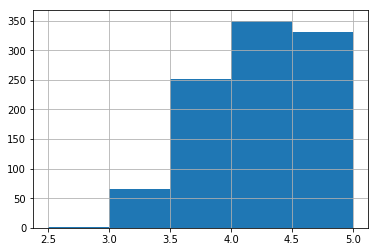

In [93]:
yelp_dataframe['rating'].hist(bins=5)

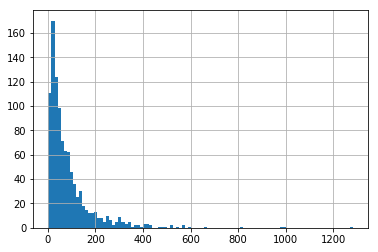

In [98]:
yelp_dataframe['review_count'].hist(bins=100)